### Background

Restaurants are a notoriously difficult business to own or operate. Not only is it a relatively capital and employee-intensive business, restaurants are also highly regulated, low margin and in most cases have a plethora of competition to deal with. There are more dining establishments and more diners now than during any other time in history; the National Restaurant Association reports over 1 million restaurant locations in the U.S. alone, a particular boon considering more than half the American population visits at least one of them each week. To fill a niche and remain relevant, prospective, as well as established, restaurants have to hedge their bets with well-rounded and well-directed dataset. Data science provides valuable insights regarding market trends and evolving consumer lifestyles so that restaurateurs can better address and meet public demand.

### Business Problem

No single restaurant is ever going to appeal to everyone. Some people like quiet, intimate settings; others prefer boisterous ones. Some people want to bring their kids along; others want to dine alone. The preferences are as varied as the possible offerings, with specific generational cohorts preferring one thing, “people who like Indian food” preferring another and everyone else liking a million other things in between.My client, a successful Filipino restaurant chain in Philippines is looking to expand operation into North America through New York (NYC).

### Problem Statement

To locate and recommend to the client which neighbourhood in New York City will be best choice to start a restaurant.

### New York city population and demographic data

In [3]:
#import and install necessary libraries 
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium

import os
import folium # map rendering library
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mp
import re
import csv
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [5]:
#web scrapping data table from wikipedia using bs4
response_obj = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Neighborhoods_NYC_Table = soup.find('table', {'class':'wikitable sortable'})

In [10]:
#checking website table from wikipedia
rows = Neighborhoods_NYC_Table.select("tbody > tr")[3:8]

boroughs = []
for row in rows:
    borough = {}
    tds = row.select('td')
    borough["borough"] = tds[0].text.strip()
    borough["county"] = tds[1].text.strip()
    borough["population"] = float(tds[2].text.strip().replace(",",""))
    borough["gdp_billions"] = float(tds[3].text.strip().replace(",",""))
    borough["gdp_per_capita"] = float(tds[4].text.strip().replace(",",""))
    borough["land_sqm"] = float(tds[5].text.strip().replace(",",""))
    borough["land_sqkm"] = float(tds[6].text.strip().replace(",",""))
    borough["persons_sqm"] = float(tds[7].text.strip().replace(",",""))
    borough["persons_sqkm"] = float(tds[8].text.strip().replace(",",""))
    
    boroughs.append(borough)

print(boroughs)

df = pd.DataFrame(boroughs, columns=["borough","county", "population", "gdp_per_capita", "persons_sqkm"]) 
df

[{'borough': 'The Bronx', 'county': 'Bronx', 'population': 1432132.0, 'gdp_billions': 42.695, 'gdp_per_capita': 29200.0, 'land_sqm': 42.1, 'land_sqkm': 109.04, 'persons_sqm': 34653.0, 'persons_sqkm': 13231.0}, {'borough': 'Brooklyn', 'county': 'Kings', 'population': 2582830.0, 'gdp_billions': 91.559, 'gdp_per_capita': 34600.0, 'land_sqm': 70.82, 'land_sqkm': 183.42, 'persons_sqm': 37137.0, 'persons_sqkm': 14649.0}, {'borough': 'Manhattan', 'county': 'New York', 'population': 1628701.0, 'gdp_billions': 600.244, 'gdp_per_capita': 360900.0, 'land_sqm': 22.83, 'land_sqkm': 59.13, 'persons_sqm': 72033.0, 'persons_sqkm': 27826.0}, {'borough': 'Queens', 'county': 'Queens', 'population': 2278906.0, 'gdp_billions': 93.31, 'gdp_per_capita': 39600.0, 'land_sqm': 108.53, 'land_sqkm': 281.09, 'persons_sqm': 21460.0, 'persons_sqkm': 8354.0}, {'borough': 'Staten Island', 'county': 'Richmond', 'population': 476179.0, 'gdp_billions': 14.514, 'gdp_per_capita': 30300.0, 'land_sqm': 58.37, 'land_sqkm': 15

,borough,county,population,gdp_per_capita,persons_sqkm
0,The Bronx,Bronx,1432132.0,29200.0,13231.0
1,Brooklyn,Kings,2582830.0,34600.0,14649.0
2,Manhattan,New York,1628701.0,360900.0,27826.0
3,Queens,Queens,2278906.0,39600.0,8354.0
4,Staten Island,Richmond,476179.0,30300.0,3132.0


In [12]:
#Webscrapping jurisdiction table from wikipedia
response_obj = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Population_Census_Table = soup.select_one('.wikitable:nth-of-type(5)') #use css selector to target correct table.

jurisdictions = []
rows = Population_Census_Table.select("tbody > tr")[3:8]
for row in rows:
    jurisdiction = {}
    tds = row.select('td')
    jurisdiction["jurisdiction"] = tds[0].text.strip()
    jurisdiction["population_census"] = tds[1].text.strip()
    jurisdiction["%_white"] = float(tds[2].text.strip().replace(",",""))
    jurisdiction["%_black_or_african_amercian"] = float(tds[3].text.strip().replace(",",""))
    jurisdiction["%_Asian"] = float(tds[4].text.strip().replace(",",""))
    jurisdiction["%_other"] = float(tds[5].text.strip().replace(",",""))
    jurisdiction["%_mixed_race"] = float(tds[6].text.strip().replace(",",""))
    jurisdiction["%_hispanic_latino_of_other_race"] = float(tds[7].text.strip().replace(",",""))
    jurisdiction["%_catholic"] = float(tds[10].text.strip().replace(",",""))
    jurisdiction["%_jewish"] = float(tds[12].text.strip().replace(",",""))
    jurisdictions.append(jurisdiction)

print(jurisdictions)

df = pd.DataFrame(jurisdictions, columns=["jurisdiction","%_white", "%_black_or_african_amercian", "%_Asian", "%_other", "%_mixed_race", "%_hispanic_latino_of_other_race"])
df.head()

[{'jurisdiction': 'Queens', 'population_census': '2,229,379', '%_white': 44.1, '%_black_or_african_amercian': 20.0, '%_Asian': 17.6, '%_other': 12.3, '%_mixed_race': 6.1, '%_hispanic_latino_of_other_race': 25.0, '%_catholic': 37.0, '%_jewish': 5.0}, {'jurisdiction': 'Manhattan', 'population_census': '1,537,195', '%_white': 54.4, '%_black_or_african_amercian': 17.4, '%_Asian': 9.4, '%_other': 14.7, '%_mixed_race': 4.1, '%_hispanic_latino_of_other_race': 27.2, '%_catholic': 11.0, '%_jewish': 9.0}, {'jurisdiction': 'Bronx', 'population_census': '1,332,650', '%_white': 29.9, '%_black_or_african_amercian': 35.6, '%_Asian': 3.0, '%_other': 25.7, '%_mixed_race': 5.8, '%_hispanic_latino_of_other_race': 48.4, '%_catholic': 14.0, '%_jewish': 5.0}, {'jurisdiction': 'Staten Island', 'population_census': '443,728', '%_white': 77.6, '%_black_or_african_amercian': 9.7, '%_Asian': 5.7, '%_other': 4.3, '%_mixed_race': 2.7, '%_hispanic_latino_of_other_race': 12.1, '%_catholic': 11.0, '%_jewish': 5.0}, {

,jurisdiction,%_white,%_black_or_african_amercian,%_Asian,%_other,%_mixed_race,%_hispanic_latino_of_other_race
0,Queens,44.1,20.0,17.6,12.3,6.1,25.0
1,Manhattan,54.4,17.4,9.4,14.7,4.1,27.2
2,Bronx,29.9,35.6,3.0,25.7,5.8,48.4
3,Staten Island,77.6,9.7,5.7,4.3,2.7,12.1
4,NYC Total,44.7,26.6,9.8,14.0,4.9,27.0


### Initial Findings and Observations

1. Brooklyn is the most populous Borough but has the lowest gdp_per_capita among the Boroughs.
2. Queen is the second most populous Borough and has higher gdp_per_capita than Brooklyn but smaller population density.
Highest interms of asian ethnic minority population.
3.Manhattan is the second asian ethnic minority population, first in gdp_per_capita and population density.
High person per km means people are living in a high rise building like appartments, hotels and condiminiums.

### Initial Hypothesis from Demographic Data of NYC

Manhattan could be the best place to start a Filipino Restaurant given that;

1.Good Economy (highest gdp_per_capita)
2.High Population density (person per km can be relate to people who are living in a high rise building)
3.Second in Asian ethnic minority population.

### Neighborhoods using FourSquare API & New York City data that contains list Boroughs, Neighbourhoods along with their latitude and longitude

In [29]:
#define a function to interact with Foursquare get top 100 venues within a radius of 1000 metres for a given latitude and longitude.
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [30]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '4XU4VO2GVGVJ5VNHGS0Z5OVAE50ZGSXSGBZUESNVRMKX03MN'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='4ENZ0UWWYV2Z4B4PT2412GM0IERFGCPEFCRAQNE1Z3U2HPCC' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Define a function to get venue details like like count , rating , tip counts for a given venue id. to be used for ranking.

In [46]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'FM32E0UU4KR1WU4VZIG1F5G1J2XFMKEGNF52UGPTSQ1J1CF1'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='R5SUZ4FBHNDVUMHP15ZKFIKI5VCQBLGPYSFGZY2LYQXMILX2' # Foursquare Secret, note there is a daily call quota it it
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [31]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [32]:
# get new york data
new_york_data=get_new_york_data()

In [33]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [34]:
new_york_data.shape

(306, 4)

There is a total of 306 Neighborhoods in New York City.

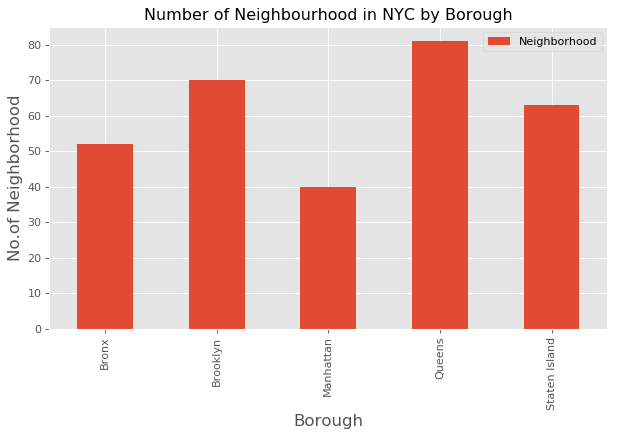

In [35]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

Queens is the most densely populated borough in New York City with 80 neighborhoods

In [36]:
# prepare neighborhood list that contains filip restaurant
column_names=['Borough', 'Neighborhood', 'ID','Name']
filip_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    filip_resturants=venues[venues['Category']=='Filipino Restaurant']   
    print('(',count,'/',len(new_york_data),')','Filipino Restaurants in '+Neighborhood+', '+Borough+':'+str(len(filip_resturants)))
    for resturant_detail in filip_resturants.values.tolist():
        id, name , category=resturant_detail
        filip_rest_ny = filip_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Filipino Restaurants in Wakefield, Bronx:0
( 2 / 306 ) Filipino Restaurants in Co-op City, Bronx:0
( 3 / 306 ) Filipino Restaurants in Eastchester, Bronx:0
( 4 / 306 ) Filipino Restaurants in Fieldston, Bronx:0
( 5 / 306 ) Filipino Restaurants in Riverdale, Bronx:0
( 6 / 306 ) Filipino Restaurants in Kingsbridge, Bronx:0
( 7 / 306 ) Filipino Restaurants in Marble Hill, Manhattan:0
( 8 / 306 ) Filipino Restaurants in Woodlawn, Bronx:0
( 9 / 306 ) Filipino Restaurants in Norwood, Bronx:0
( 10 / 306 ) Filipino Restaurants in Williamsbridge, Bronx:0
( 11 / 306 ) Filipino Restaurants in Baychester, Bronx:0
( 12 / 306 ) Filipino Restaurants in Pelham Parkway, Bronx:0
( 13 / 306 ) Filipino Restaurants in City Island, Bronx:0
( 14 / 306 ) Filipino Restaurants in Bedford Park, Bronx:0
( 15 / 306 ) Filipino Restaurants in University Heights, Bronx:0
( 16 / 306 ) Filipino Restaurants in Morris Heights, Bronx:0
( 17 / 306 ) Filipino Restaurants in Fordham, Bronx:0
( 18 / 306 ) Filipino

( 136 / 306 ) Filipino Restaurants in Forest Hills, Queens:0
( 137 / 306 ) Filipino Restaurants in Kew Gardens, Queens:0
( 138 / 306 ) Filipino Restaurants in Richmond Hill, Queens:0
( 139 / 306 ) Filipino Restaurants in Flushing, Queens:0
( 140 / 306 ) Filipino Restaurants in Long Island City, Queens:0
( 141 / 306 ) Filipino Restaurants in Sunnyside, Queens:1
( 142 / 306 ) Filipino Restaurants in East Elmhurst, Queens:0
( 143 / 306 ) Filipino Restaurants in Maspeth, Queens:0
( 144 / 306 ) Filipino Restaurants in Ridgewood, Queens:0
( 145 / 306 ) Filipino Restaurants in Glendale, Queens:0
( 146 / 306 ) Filipino Restaurants in Rego Park, Queens:0
( 147 / 306 ) Filipino Restaurants in Woodhaven, Queens:0
( 148 / 306 ) Filipino Restaurants in Ozone Park, Queens:0
( 149 / 306 ) Filipino Restaurants in South Ozone Park, Queens:0
( 150 / 306 ) Filipino Restaurants in College Point, Queens:0
( 151 / 306 ) Filipino Restaurants in Whitestone, Queens:0
( 152 / 306 ) Filipino Restaurants in Baysi

( 267 / 306 ) Filipino Restaurants in Astoria Heights, Queens:0
( 268 / 306 ) Filipino Restaurants in Claremont Village, Bronx:0
( 269 / 306 ) Filipino Restaurants in Concourse Village, Bronx:0
( 270 / 306 ) Filipino Restaurants in Mount Eden, Bronx:0
( 271 / 306 ) Filipino Restaurants in Mount Hope, Bronx:0
( 272 / 306 ) Filipino Restaurants in Sutton Place, Manhattan:0
( 273 / 306 ) Filipino Restaurants in Hunters Point, Queens:0
( 274 / 306 ) Filipino Restaurants in Turtle Bay, Manhattan:0
( 275 / 306 ) Filipino Restaurants in Tudor City, Manhattan:0
( 276 / 306 ) Filipino Restaurants in Stuyvesant Town, Manhattan:2
( 277 / 306 ) Filipino Restaurants in Flatiron, Manhattan:0
( 278 / 306 ) Filipino Restaurants in Sunnyside Gardens, Queens:1
( 279 / 306 ) Filipino Restaurants in Blissville, Queens:0
( 280 / 306 ) Filipino Restaurants in Fulton Ferry, Brooklyn:0
( 281 / 306 ) Filipino Restaurants in Vinegar Hill, Brooklyn:0
( 282 / 306 ) Filipino Restaurants in Weeksville, Brooklyn:0
(

In [37]:
filip_rest_ny.shape

(20, 4)

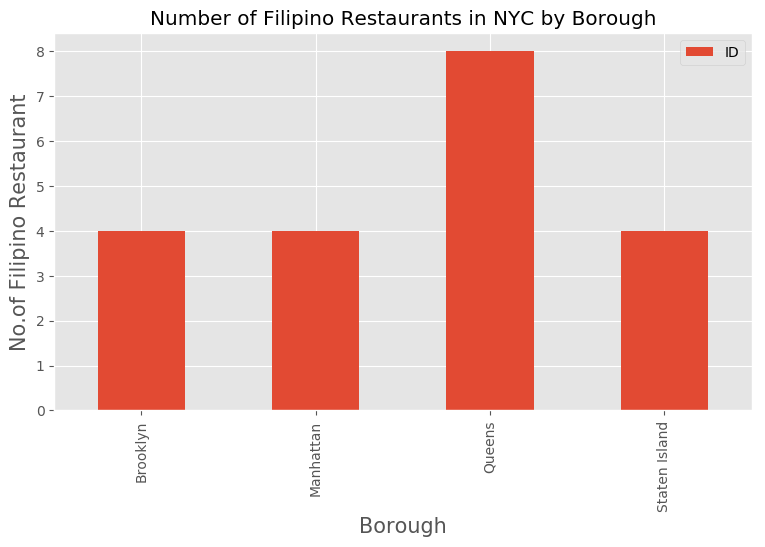

In [40]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Filipino Restaurants in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Filipino Restaurant', fontsize=15)
#giving a bar plot
filip_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Queens has the highest number of Filipino Restaurant.

In [42]:
#Filipino Restaurants in Woodside
filip_rest_ny[filip_rest_ny['Neighborhood']=='Woodside']

,Borough,Neighborhood,ID,Name
4,Queens,Woodside,4b5232def964a520456f27e3,Renee's Kitchenette & Grille
5,Queens,Woodside,4a21ab5bf964a520277d1fe3,Ihawan
6,Queens,Woodside,53040a6e498ef035406f9cbf,House of Inasal


Woodside has 3 Filipino restaurants in their neighborhood.(Wow! Inasal!)

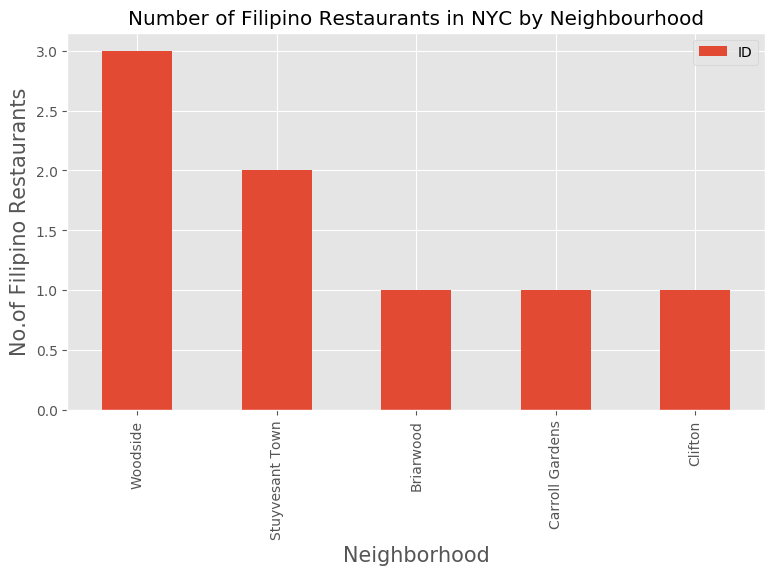

In [44]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Filipino Restaurants in NYC by Neighbourhood')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Filipino Restaurants', fontsize=15)
#giving a bar plot
filip_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Woodside has the most Filipino Restaurant with a total of 3.

In [47]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
filip_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in filip_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
filip_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in filip_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(filip_rest_ny),')','processed')
    filip_rest_stats_ny = filip_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4afa2432f964a520081722e3  Purple Yam    137     7.9    76
( 1 / 20 ) processed
                         ID            Name  Likes  Rating  Tips
0  591e55677247502fb9514269  Fob Restaurant     55     7.8    28
( 2 / 20 ) processed
                         ID        Name  Likes  Rating  Tips
0  4afa2432f964a520081722e3  Purple Yam    137     7.9    76
( 3 / 20 ) processed
                         ID          Name  Likes  Rating  Tips
0  50588bc6526260483ab2860e  Pig and Khao   1081     9.1   301
( 4 / 20 ) processed
                         ID                          Name  Likes  Rating  Tips
0  4b5232def964a520456f27e3  Renee's Kitchenette & Grille     60     8.6    20
( 5 / 20 ) processed
                         ID    Name  Likes  Rating  Tips
0  4a21ab5bf964a520277d1fe3  Ihawan     94     8.4    41
( 6 / 20 ) processed
                         ID             Name  Likes  Rating  Tips
0  53040a6e498ef035406f9cbf  House o

In [48]:
filip_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Flatbush,4afa2432f964a520081722e3,Purple Yam,137,7.9,76
1,Brooklyn,Carroll Gardens,591e55677247502fb9514269,Fob Restaurant,55,7.8,28
2,Brooklyn,Prospect Park South,4afa2432f964a520081722e3,Purple Yam,137,7.9,76
3,Manhattan,Lower East Side,50588bc6526260483ab2860e,Pig and Khao,1081,9.1,301
4,Queens,Woodside,4b5232def964a520456f27e3,Renee's Kitchenette & Grille,60,8.6,20


In [49]:
filip_rest_stats_ny.shape

(20, 7)

In [50]:
filip_rest_ny.shape

(20, 4)

In [52]:
filip_rest_stats_ny.to_csv('filip_rest_stats_ny.csv', index=False)
print("File Saved!")

File Saved!


In [53]:
#Will use saved csv file status just incase we mess up anything
filip_rest_stats_ny_csv=pd.read_csv('filip_rest_stats_ny.csv')

In [54]:
filip_rest_stats_ny_csv.shape

(20, 7)

In [55]:
filip_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Flatbush,4afa2432f964a520081722e3,Purple Yam,137,7.9,76
1,Brooklyn,Carroll Gardens,591e55677247502fb9514269,Fob Restaurant,55,7.8,28
2,Brooklyn,Prospect Park South,4afa2432f964a520081722e3,Purple Yam,137,7.9,76
3,Manhattan,Lower East Side,50588bc6526260483ab2860e,Pig and Khao,1081,9.1,301
4,Queens,Woodside,4b5232def964a520456f27e3,Renee's Kitchenette & Grille,60,8.6,20


In [56]:
filip_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Borough         20 non-null object
Neighborhood    20 non-null object
ID              20 non-null object
Name            20 non-null object
Likes           20 non-null object
Rating          20 non-null float64
Tips            20 non-null object
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


Likes and Tips are default object, we will changed it to float64

In [58]:
filip_rest_stats_ny['Likes']=filip_rest_stats_ny['Likes'].astype('float64')
filip_rest_stats_ny['Tips']=filip_rest_stats_ny['Tips'].astype('float64')

In [60]:
filip_rest_stats_ny.info()
print("Likes and Tips is now float!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Borough         20 non-null object
Neighborhood    20 non-null object
ID              20 non-null object
Name            20 non-null object
Likes           20 non-null float64
Rating          20 non-null float64
Tips            20 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.2+ KB
Likes and Tips is now float!


In [64]:
# Restaurants with maximum Likes
filip_rest_stats_ny.iloc[filip_rest_stats_ny['Likes'].idxmax()]
    

Borough                        Manhattan
Neighborhood             Lower East Side
ID              50588bc6526260483ab2860e
Name                        Pig and Khao
Likes                               1081
Rating                               9.1
Tips                                 301
Name: 3, dtype: object

In [66]:
# Restaurants with Highest Rating
filip_rest_stats_ny.iloc[filip_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood             Lower East Side
ID              50588bc6526260483ab2860e
Name                        Pig and Khao
Likes                               1081
Rating                               9.1
Tips                                 301
Name: 3, dtype: object

In [67]:
# Restaurants with maximum Tips
filip_rest_stats_ny.iloc[filip_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood             Lower East Side
ID              50588bc6526260483ab2860e
Name                        Pig and Khao
Likes                               1081
Rating                               9.1
Tips                                 301
Name: 3, dtype: object

In [68]:
ny_neighborhood_stats=filip_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [69]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
8,Noho,9.100000
7,Lower East Side,9.100000
15,Sunnyside Gardens,8.900000
14,Sunnyside,8.900000
13,Stuyvesant Town,8.350000
16,Woodside,8.166667
4,Elmhurst,8.000000
5,Flatbush,7.900000
10,Prospect Park South,7.900000
3,Ditmas Park,7.900000


In [ ]:
Noho and Lower East Side are the top rated Neighborhoods.

In [70]:
ny_borough_stats=filip_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [71]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.7250
0,Brooklyn,7.8750
2,Queens,7.8625
3,Staten Island,7.6000


Manhattan is the Top Rated Borough in the New York.

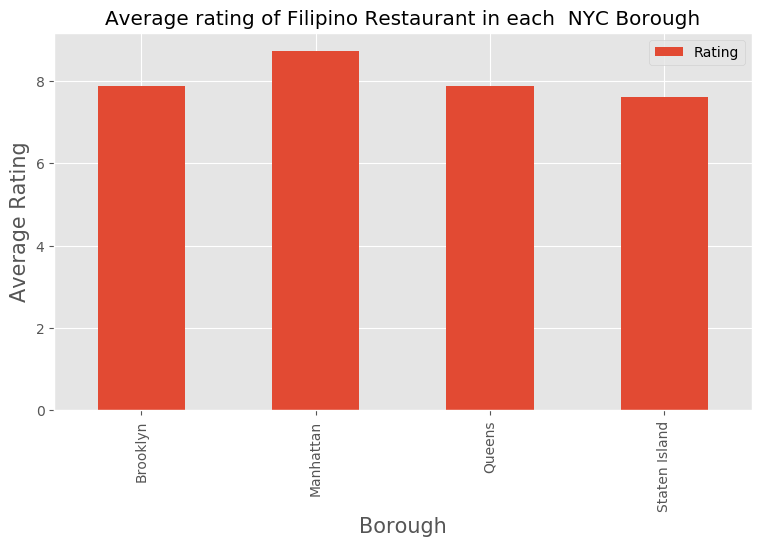

In [72]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Filipino Restaurant in each  NYC Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
filip_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

Manhattan has the average top rating Filipino Retaurant in NYC Borough.

Let us visualized in the map, All the neighborhoods with average rating greater or equal 7.0.

In [75]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.0]

In [76]:
ny_neighborhood_stats

,Neighborhood,Average Rating
4,Elmhurst,8.000000
7,Lower East Side,9.100000
8,Noho,9.100000
13,Stuyvesant Town,8.350000
14,Sunnyside,8.900000
15,Sunnyside Gardens,8.900000
16,Woodside,8.166667


In [77]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

In [78]:

ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [79]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
1,Manhattan,Lower East Side,40.717807,-73.980890,9.100000
2,Manhattan,Noho,40.723259,-73.988434,9.100000
4,Queens,Sunnyside,40.740176,-73.926916,8.900000
5,Staten Island,Sunnyside,40.612760,-74.097126,8.900000
6,Queens,Sunnyside Gardens,40.745652,-73.918193,8.900000
3,Manhattan,Stuyvesant Town,40.731000,-73.974052,8.350000
7,Queens,Woodside,40.746349,-73.901842,8.166667
0,Queens,Elmhurst,40.744049,-73.881656,8.000000


In [80]:
# create map and display it
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [81]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [82]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

### Best neighborhoods in New York that has highest average rating for Filipino Restaurants

In [84]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

### Findings

1. Lower East Side, Noho, Stuyvesant in Manhattan are some of the best neighborhoods for Filipino cuisine.
2. Staten Island Neighborhood has the lowest rated Indian Restaurants in NYC.
3. Manhattan Borough is the best place to stay if you prefer Indian Cuisine.
4. Bronx Borough does not have Filipino Restaurant at the moment.

### Conclusion and  Recommendation

#### 1. Lower East Sice or Noho in Manhattan would be the best choice to start a restaurant given that;

####     * -- it is the third most populous urban area in New York City (NYC).
####     * --it has a population density of 27,826 people per square km, and confirmed highest of any borough in the United States.
####     * --it has a good economy (gdp_per_capita).
####     * --it has some of the top rated Filipino restaurants located in that area
####     * --it has the second highest Asian ethnic minority population in NYC.

#### 2. There are very few Filipino Restaurants in Manhattan and the competition is very weak therefore, this the best time to start a Filipino Restaurant in the neighboorhood of Manhattan.